# Python Neural Genetic Algorithm Hybrids

Tutorial: http://pyneurgen.sourceforge.net/tutorial_ge.html

Need to use python2

## Grammatical Evolution Tutorial:

This tutorial presents a short, easy problem to solve using Grammatical Evolution techniques with this software. The example uses only the grammatical evolution portion rather than a hybrid for clarity.
### Installation

The quickest way to install is with easy_install. Since this is a Python library, at the Python prompt put:

```bash
easy_install pyneurgen
```

or:

In [1]:
!python2 -m pip install pyneurgen --user

You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from pyneurgen.grammatical_evolution import GrammaticalEvolution
from pyneurgen.fitness import FitnessElites, FitnessTournament
from pyneurgen.fitness import ReplacementTournament, MAX, MIN, CENTER

In [16]:
bnf =   """
<expr>              ::= <expr> <biop> <expr> | <uop> <expr> | <real> |
                        math.log(abs(<expr>)) | <pow> | math.sin(<expr>)|
                        value | (<expr>)
<biop>              ::= + | - | * | /
<uop>               ::= + | -
<pow>               ::= pow(<expr>, <real>)
<plus>              ::= +
<minus>             ::= -
<real>              ::= <int-const>.<int-const>
<int-const>         ::= <int-const> | 1 | 2 | 3 | 4 | 5 | 6 |
                        7 | 8 | 9 | 0
<S>                 ::=
import math
total = 0.0
for i in xrange(100):
    value = float(i) / float(100)
    total += abs(<expr> - pow(value, 3))
fitness = total
self.set_bnf_variable('<fitness>', fitness)
        """

In [17]:
ges = GrammaticalEvolution()

ges.set_bnf(bnf)
ges.set_genotype_length(start_gene_length=20,
                        max_gene_length=50)
ges.set_population_size(50)
ges.set_wrap(True)

ges.set_max_generations(1000)
ges.set_fitness_type(MIN, .01)

ges.set_max_program_length(500)
ges.set_timeouts(10, 120)
ges.set_fitness_fail(100.0)

ges.set_fitness_selections(
    FitnessElites(ges.fitness_list, .05),
    FitnessTournament(ges.fitness_list, tournament_size=2))
ges.set_max_fitness_rate(.5)

ges.set_mutation_rate(.025)
ges.set_fitness_selections(
    FitnessElites(ges.fitness_list, .05),
    FitnessTournament(ges.fitness_list, tournament_size=2))
ges.set_max_fitness_rate(.5)

ges.set_crossover_rate(.2)
ges.set_children_per_crossover(2)
ges.set_mutation_type('m')
ges.set_max_fitness_rate(.25)

ges.set_replacement_selections(
        ReplacementTournament(ges.fitness_list, tournament_size=3))

ges.set_maintain_history(True)

In [18]:
ges.create_genotypes()
print ges.run()

34


In [29]:
sorted(ges.fitness_list)[:10]

[[0.0, 34],
 [0.640942314743, 0],
 [0.640942314743, 1],
 [0.640942314743, 2],
 [0.640942314743, 3],
 [0.640942314743, 4],
 [0.640942314743, 5],
 [0.640942314743, 6],
 [0.640942314743, 7],
 [0.640942314743, 8]]

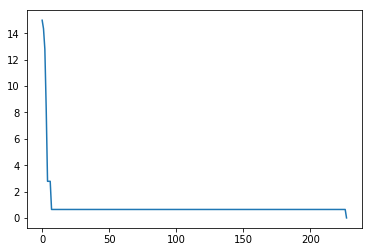

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ges.get_fitness_history())

## Best generated program:

In [27]:
print ges.get_best_member().get_program()

import math
total = 0.0
for i in xrange(100):
    value = float(i) / float(100)
    total += abs(pow(value, 3.0) - pow(value, 3))
fitness = total
self.set_bnf_variable('<fitness>', fitness)



## Worst generated program:

In [28]:
print ges.get_worst_member().get_program()

import math
total = 0.0
for i in xrange(100):
    value = float(i) / float(100)
    total += abs(6.2*+math.log(abs(math.log(abs(pow(++-math.sin(math.log(abs(++5.6)))/pow(pow(value, 3.9), 4.7)*value, 3.8))))) - pow(value, 3))
fitness = total
self.set_bnf_variable('<fitness>', fitness)

